<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/%E9%9B%BB%E7%A3%81%E5%AD%B8/%E9%9B%BB%E5%AE%B9%E5%85%85%E9%9B%BB%E8%99%9B%E6%93%AC%E5%AF%A6%E9%A9%97%E5%A0%B1%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 電容充電實驗報告

報告人

###摘要

本實驗利用電容RC充電電路測量待測電容的測量值。在TinkerCAD虛擬電路實驗平台上建立RC充電電路，電路元件包含待測電容(C，單位 mF)、預設電阻(R=1.0k)、電池(V=9.0 V)、開關(S)，及測量儀器：三用電表與碼表。實驗過程中，同時測量電容器正負兩端的電壓差與其對應的充電時間。利用試算表紀錄實驗劇，並繪製電壓對時間關係圖。根據電路原理分析充電電路方程式，經過數學計算後，得到電容器充電電壓與時間的數學模型，需要兩個參數滿電電壓 (V0)及特徵時間（0）。為分析實驗數據與理論模型間的關係，使用python程式撰寫數據分析程式，利用曲線擬合函數curve_fit，計算實驗數據在理論模型的數學型態下所得的擬合參數值：滿電電壓 (V0=(8.970.01)V)及特徵時間（0=(9.710.05)s）。根據所測得的特徵時間，得到待測電容的實驗測量電容值為C=(9.710.05)mF。
![電容測量實驗報告範本.jpg](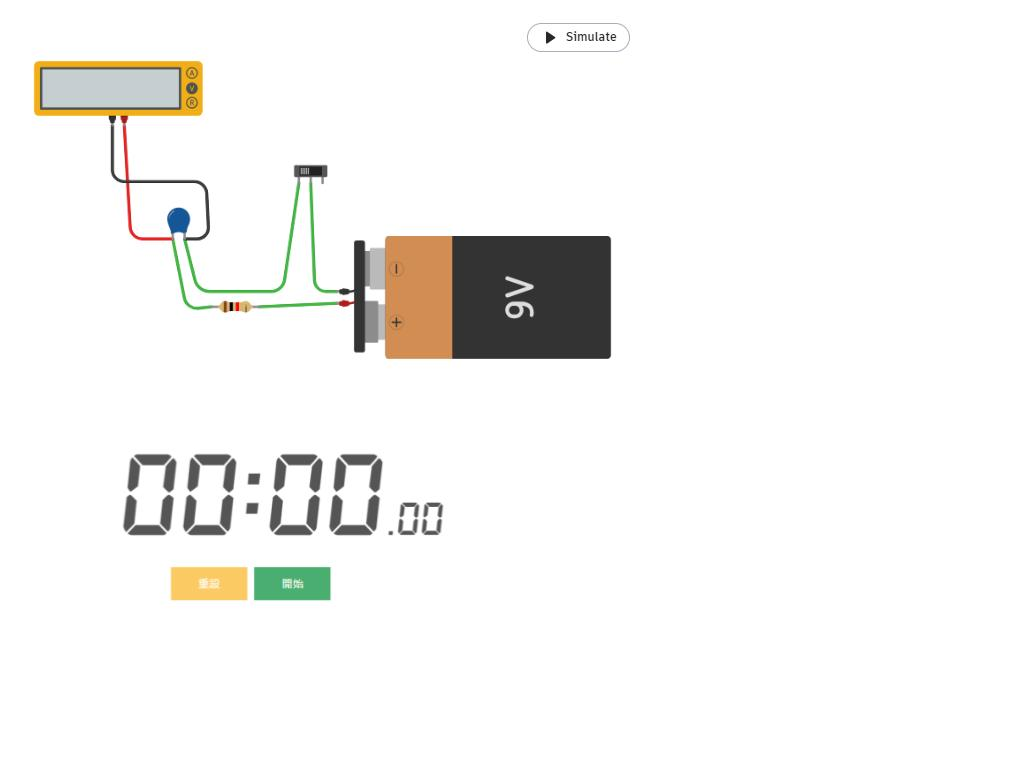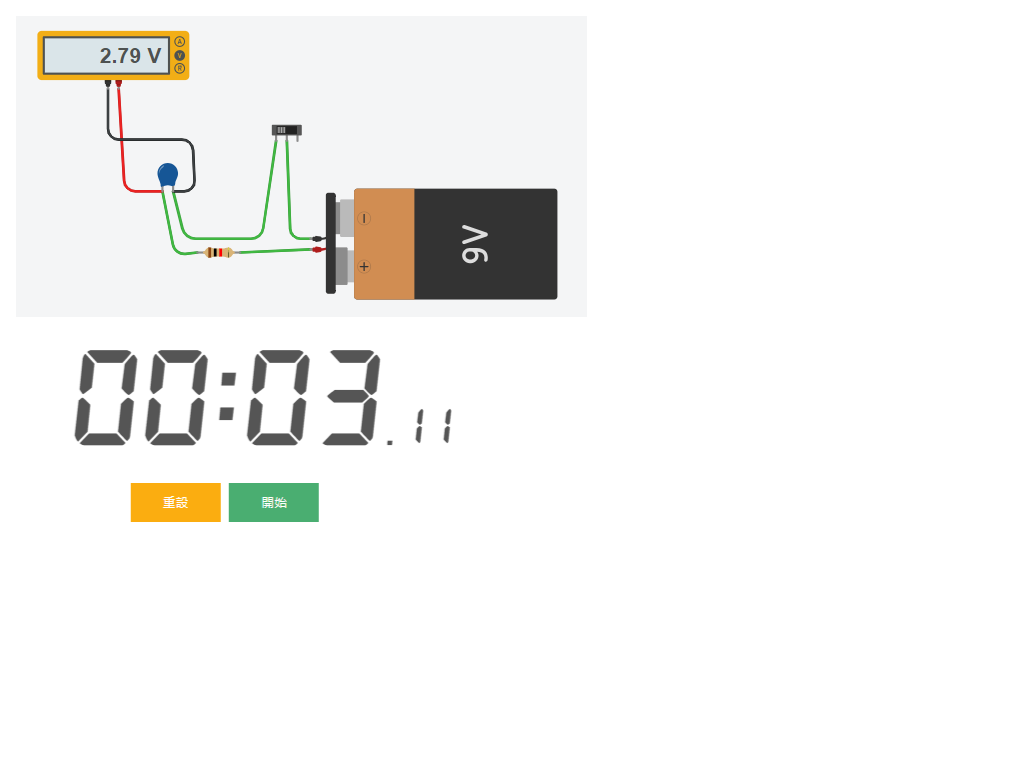)

## 實驗目的：

利用電容器充電電路，測量電容器端電壓對時間關係，利用曲線擬合方法根據實踐數據，計算特徵時間，進而得到待測電容的電容值。


##實驗器材：
虛擬實驗平台、待測電容器(單位 mF)，已知電阻(1.0 k)、電池(9.0V)、開關(S)、電路數條、三用電表(I、V、R)、碼表(精確度0.01s)。

##實驗步驟：


1.   在TinkerCAD虛擬平台上，將電容器、電阻、電池、開關、三用電表連接如右圖所示電路。
2.   將三用電表設定在電壓計。電阻器的電阻值設定為R=1.0k。電容器設定為C=10.0mF。
3.  點選模擬鍵後，開啟電路開關，並同時開啟碼表開始計時。利用螢幕錄影工具，錄製實驗過程。
4.  當電位計中顯示電容器中的電壓值達到V=9.0V時，即可停止錄影紀錄。
回放錄影紀錄，並隨機取樣30個數據點，紀錄電壓值與對應碼表上顯示的時刻。
5.  將數據紀錄在google 試算表，如下數據圖。



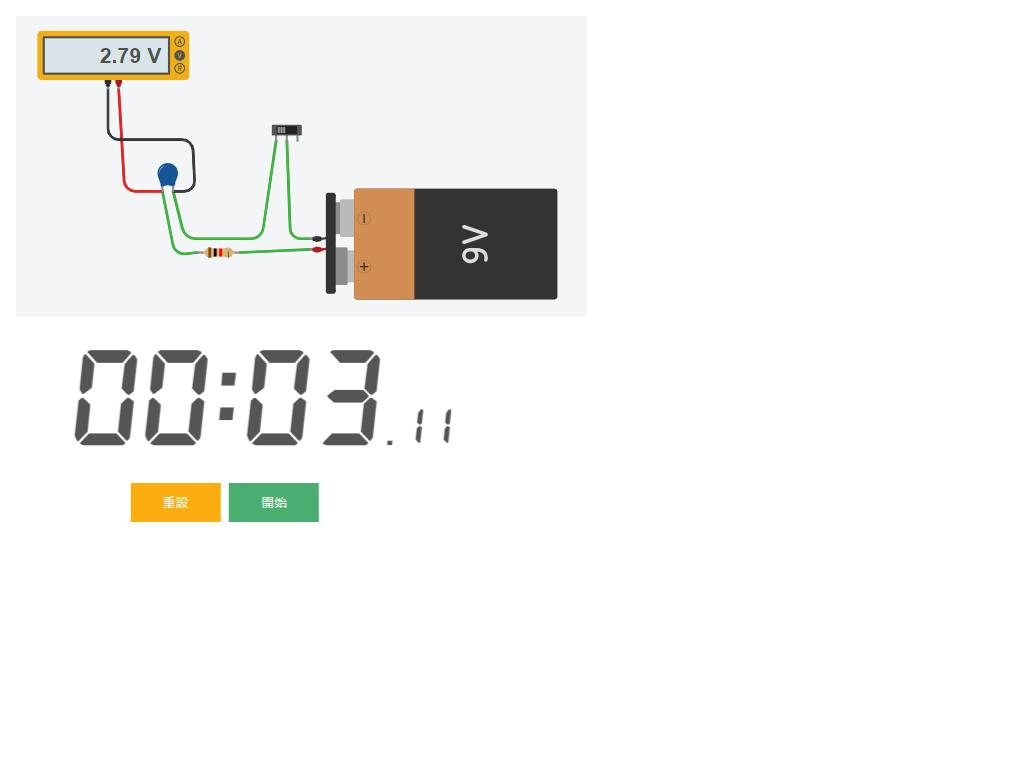

## 實驗數據
1.實驗記錄數據表如下：
[數據](https://docs.google.com/spreadsheets/d/e/2PACX-1vQQap51bZIkpI3-Ey9EKdX8qQ2AopYGVGPs8bZkLu93Z_g4iaV2BYhqchB_vkFMERDB1-ivbMboPL2Y/pub?gid=0&single=true&output=csv)

[電壓時間圖](https://docs.google.com/spreadsheets/d/e/2PACX-1vQQap51bZIkpI3-Ey9EKdX8qQ2AopYGVGPs8bZkLu93Z_g4iaV2BYhqchB_vkFMERDB1-ivbMboPL2Y/pubchart?oid=1689721926&format=interactive)
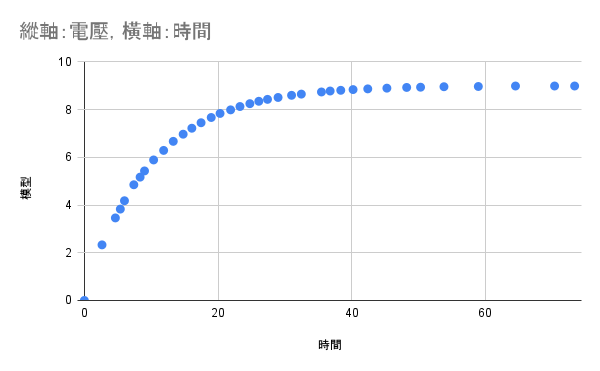

##理論分析
實驗的RC電路的電路方程式為

$$V_0-\frac{Q}{C}-RI=0$$

其中 V0 為電池的端電壓，Q與C分別為電容器的儲存電荷及電容值，R及I為電阻器的電阻及通過電阻的電流。 因為電流 I=dQ/dt，上述方程式可以改寫成：

$$V_0-\frac{Q}{C}-R\frac{dQ}{dt}=0$$

重新整理為電荷的微分方程式：

$$\frac{dQ}{dt}=\frac{V_0}{R}-\frac{Q}{RC}$$

等式兩邊進行交叉相乘後：

$$\frac{dQ}{(\frac{V_0}{R}-\frac{Q}{RC})}=dt$$

對等式兩邊進行積分：

$$\int_0^Q \frac{dQ}{(\frac{V_0}{R}-\frac{Q}{RC})}=\int_0^t dt$$
進行變數變換：

$$u=\frac{V_0}{R}-\frac{Q}{RC}$$

積分改寫成：

$$-RC\int_{u(0)}^{u(Q)}\frac{du}{u}=\int_0^t dt $$

查積分表得到下式：

$$-RC\ln{\left(\frac{\frac{V_0}{R}-\frac{Q}{RC}}{\frac{V_0}{R}}\right)}=t$$

簡化上式如下：
$$\ln{\left(\frac{\frac{V_0}{R}-\frac{Q}{RC}}{\frac{V_0}{R}}\right)}=-\frac{t}{RC}$$
利用函數與反函數，將兩邊同時作用指數函數 $exp()$

$$\exp(\ln(\frac{V_0/R-Q/(RC)}{V_0/R}))=\exp{(-t/(RC))}$$

將對數函數轉換成單位函數：

$$\frac{\frac{V_0}{R}-\frac{Q}{RC}}{\frac{V_0}{R}}=\exp(-t/RC)$$
簡化上式得到下式：

$$V(t)=QC=V0(1-e^{-t/{\tau_C}})$$

其中 $\tau_C=RC$ 稱為特徵時間。


##數據分析
為從實驗數據中得到測量電容,利用python程式撰寫分析程式如下:
1.  載入繪圖程式庫 mathplotlib.pyplot 並重新命名為 plt
2.  載入數值計算程式庫 numpy 並重新命名為 np
3.  載入科學常用最佳化程式庫 scipy.optimize 的曲線擬合函式 curve_fit


In [ ]:
import matplotlib.pyplot as plt #繪製數據圖
import numpy as np #數據計算
from scipy.optimize import curve_fit #模型擬合分析

4.  建立實驗數據，xdata代表時間數據，ydata代表電壓數據


## 數據

時間數據 $xdata=[x1,x2,x3,\cdots,x37]$， 電壓數據 $ytata=[y1,y2,y3,\cdots,y37]$。

In [ ]:
xdata=[0,2.64,4.64,5.38,6,7.4,8.34,9,10.36,11.86,13.3,14.78,16.08,17.46,18.98,20.3,21.88,23.28,24.76,26.1,27.4,28.98,31,32.46,35.47,36.77,38.36,40.2,42.4,45.26,48.22,50.3,53.8,58.94,64.5,70.35,73.35]
ydata=[0,2.33,3.46,3.83,4.18,4.85,5.17,5.43,5.89,6.29,6.67,6.97,7.22,7.45,7.67,7.84,7.99,8.13,8.25,8.35,8.43,8.51,8.6,8.65,8.74,8.78,8.81,8.84,8.87,8.9,8.93,8.94,8.96,8.97,8.99,8.99,8.99]


5.  轉換xdata及ydata由列表格式為矩陣格式
6.  利用繪圖方法 plt.plot繪製數據圖


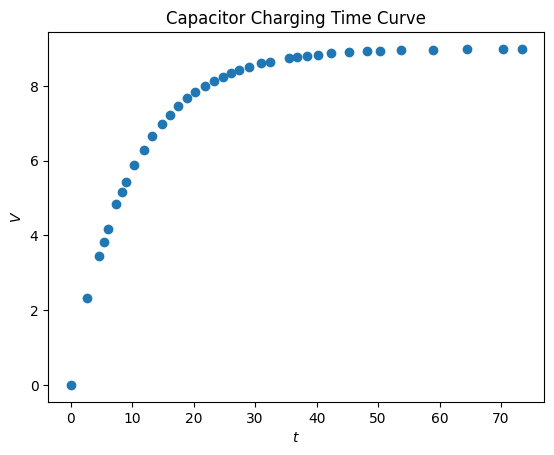

In [ ]:
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
#yerror = np.asarray(yerror)
#fig, ax = plt.subplots()
#plt.errorbar(xdata, ydata, yerr=yerror, xerr=0, fmt='none')
plt.plot(xdata, ydata, 'o')
plt.xlabel(r"$t$")
plt.ylabel(r"$V$")
plt.title("Capacitor Charging Time Curve")
plt.show()

7.  建立擬合數學模型： 擬合參數 $A$(代表電池電壓 $V_0$)及$B$(代表特徵時間 $\tau_C$)
$$ y=A(1-e^{-x/B})$$


In [ ]:
# Define the Model function
def Model(x, A, B):
    y = A*(1-np.exp(-x/B))
    return y

8.  使用 curve_fit 函式分析數據以得到參數 A及B：
9.  計算結果輸出至 parameters (1X2矩陣儲存擬合參數 A及B)，covariance (2x2矩陣， 儲存擬合誤差：共變矩陣)


In [ ]:
parameters, covariance = curve_fit(Model, xdata, ydata)
parameters[0],parameters[1]

(8.973709725125405, 9.708867438469854)

10.  根據共變矩陣，計算A及B的標準偏差


In [ ]:
fit_A = parameters[0] # A的擬合值
fit_B = parameters[1] # B的擬合值
perr = np.sqrt(np.diag(covariance)) #計算參數 A,B的標準偏差
err_A = perr[0] #A的標準偏差
err_B = perr[1] #B的標準偏差

11.  繪製數據圖與擬合模型以比較擬合結果


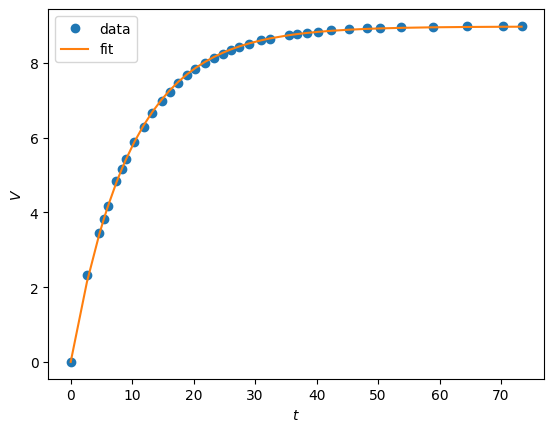

In [ ]:
fit_y = Model(xdata, fit_A, fit_B)
#plt.errorbar(xdata, ydata, yerr=yerror, xerr=0, fmt='none')
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()
plt.xlabel(r"$t$")
plt.ylabel(r"$V$")
plt.title('')
plt.show()

In [ ]:
print("實驗模型為 A*(1-e^(-t/B)：")
print("A: %5.2f" % fit_A, "err_A：%5.2f" % err_A) #保留三位有效數字
print( 'B: %5.2f' % fit_B, 'err_B: %5.2f' % err_B) #保留5位整數，2位小數

實驗模型為 A*(1-e^(-t/B)：
A:  8.97 err_A： 0.01
B:  9.71 err_B:  0.05


12.  實驗數據分析結果：

電池電壓：
$$V_0=(8.97\pm 0.01)V$$
特徵時間：
$$\tau_C=(9.71 \pm 0.05)s$$


##討論
1.  電池電壓的初始值為 $V0=9.0 V$，實驗測量值為 $(8.970.01)V$。百分誤差約為$0.3\%$。
2. 特徵時間實驗值為 $\tau_C=(9.710.05)s$，利用 $\tau_C=RC$，及$R=1.0k\Omega$，可以計算得到電容實驗值為 $C=(9.710.05) mF$。
4. 已知電容器的設定值為 $10.0 mF$，實驗值與理論值間的相差約為 $0.3mF$，百分誤差為$3\%$。


##結論
本次實驗利用虛擬平台TinkerCAD進行電容器充電實驗，充電過程中透過錄影方式全程測量電容器端電壓隨時間變化的過程，並利用抽樣方式隨機抽取37點時間點紀錄其對應的電壓值。測量的實驗數據先記錄於試算表，並繪製數據圖以理解電壓與時間的變化關係。接著，根據電容器的電容操作型定義，分析充電電路的電路方程式，並利用微積分方法得到電容器端電壓對時間的數學模型。接著，利用python語言撰寫數據分析程式，對數據進行模型的電池端電壓及電容器充電電路的特徵時間進行曲線擬合分析，獲得電池端電壓測量值與設定值間的誤差小於0.3%，以及電容器的電容測量值與設定值間的誤差小於3%。

本實驗顯示下列發現：
1.  在TinkerCAD虛擬平台上實施電容器充電電路實驗是可行的。
2.  實驗測量結果可以利用傳統數據分析方法進行分析，並可獲得接近真實實驗的實驗數據。
3.  在虛擬實驗中，使用者可以操作虛擬實驗器材，進行虛擬模擬實驗，增進對實驗操作的能力。
4.  在虛擬實驗中，使用者可以設定實驗條件，以使實驗過程適合人體感官的直接觀察，進而增進認知過程發生，進而促進概念及能力等面向的學習。
